In [1]:
import re, numpy as np, matplotlib.pyplot as plt, pandas as pd

In [14]:

with open('Conversa do WhatsApp com Genial & Anspace - TI.txt', encoding = "utf8") as f:
    chat_do_wpp = f.read()


# Nossa conversa sempre vai seguir o padrão "dd/mm/aaaa hh:mm - 'Mensagem em texto aqui'"
# Padrão regex garante que cada 
patron = re.compile(r'(?P<data>\d{2}/\d{2}/\d{4} \d{2}:\d{2})\s+-\s+(?P<nome>[^:]+):\s+(?P<mensagem>[\s\S]+?)(?=\n\d{2}/\d{2}/\d{4}|\Z)')
coincidencias = patron.findall(chat_do_wpp)

# Montando o banco de dados com as mensagens
chat_processado = pd.DataFrame(coincidencias, columns = ['DATA', 'EMISSOR', 'MENSAGEM'])
chat_processado['HORA'] = pd.to_datetime(chat_processado['DATA'], dayfirst=True).dt.hour
chat_processado['MINUTO'] = pd.to_datetime(chat_processado['DATA'], dayfirst=True).dt. minute
chat_processado['DATA'] = pd.to_datetime(chat_processado['DATA'], dayfirst=True).dt.to_period('M')

# adicionar uma coluna com listas referentes aos valores de E2E encontrados na mensagem
patron2 = re.compile(r'[deDE][\w]{31}')
lista = []
for i in range (len(chat_processado)):
    lista.append(patron2.findall(chat_processado['MENSAGEM'].loc[i]))
chat_processado['E2E'] = lista
display(chat_processado)

midia_oculta = chat_processado.loc[(chat_processado['MENSAGEM'] == '<Mídia oculta>') & (chat_processado['EMISSOR'] != 'Biriri Genial') & (chat_processado['EMISSOR'] != 'Plantao GENIAL Winco')]


DATA               EMISSOR  \
0      2023-04         Biriri Genial   
1      2023-04     +55 21 97921-1667   
2      2023-04         Biriri Genial   
3      2023-04     +55 21 97059-5493   
4      2023-04     +55 21 97059-5493   
...        ...                   ...   
18886  2024-01     +55 22 99823-0942   
18887  2024-01  Plantao GENIAL Winco   
18888  2024-01  Plantao GENIAL Winco   
18889  2024-01  Plantao GENIAL Winco   
18890  2024-01     +55 21 98307-8671   

                                                MENSAGEM  HORA  MINUTO  \
0                             Localizamos essa transação     6      58   
1      Poderia enviar o comprovante de saque\n\nE4524...     7      58   
2                                         <Mídia oculta>     8       5   
3                                         <Mídia oculta>     8      39   
4      Poderiam verificar este depósito por gentileza...     8      40   
...                                                  ...   ...     ...   
18886  poderia verificar                             ...    18      26   
18887                                   Mensagem apagada    18      28   
18888                                     <Mídia oculta>    18      29   
18889                                     <Mídia oculta>    18      29   
18890                                         obrigado\n    18      29   

                                      E2E  
0                                      []  
1      [E45246410202304280907Tczvou74Kuy]  
2                                      []  
3                                      []  
4                                      []  
...                                   ...  
18886  [E003603052024013020353934EB2A3AB]  
18887                                  []  
18888                                  []  
18889                                  []  
18890                                  []  

[18891 rows x 6 columns]

In [15]:
# Construindo o banco de dados dos E2E

e2e_df = pd.DataFrame(columns = ['DATA', 'HORA', 'MINUTO', 'EMISSOR','E2E'])

for i in range(len(chat_processado)):
    for value in chat_processado['E2E'].loc[i]:
        row = {'DATA': chat_processado['DATA'].loc[i], 'HORA': chat_processado['HORA'].loc[i], 'MINUTO': chat_processado['MINUTO'].loc[i], 'EMISSOR': chat_processado['EMISSOR'].loc[i],'E2E': value}
        e2e_df.loc[len(e2e_df)] = row

display(e2e_df)


DATA  HORA  MINUTO            EMISSOR  \
0     2023-04     7      58  +55 21 97921-1667   
1     2023-04     8      51  +55 21 97059-5493   
2     2023-04    10      10  +55 21 97059-5493   
3     2023-04    10      21  +55 21 97059-5493   
4     2023-04    12      18  +55 21 97059-5493   
...       ...   ...     ...                ...   
6052  2024-01    16      15  +55 21 98307-8671   
6053  2024-01    16      25  +55 21 98307-8671   
6054  2024-01    17      32  +55 21 98307-8671   
6055  2024-01    18      12  +55 21 98307-8671   
6056  2024-01    18      26  +55 22 99823-0942   

                                   E2E  
0     E45246410202304280907Tczvou74Kuy  
1     E45246410202304280021YsKFMInsswf  
2     E45246410202304281230DBJLbVksUct  
3     E45246410202304281249Ik8xZugRTu6  
4     E45246410202304281458PD1JkAm8jjk  
...                                ...  
6052  E452464102024013019074XrqPiRoBXA  
6053  e08561701202312052032e4i7huFFLSZ  
6054  E45246410202401302023PNPHsnwmMcA  
6055  e00360305202401201558002a3570643  
6056  E003603052024013020353934EB2A3AB  

[6057 rows x 5 columns]

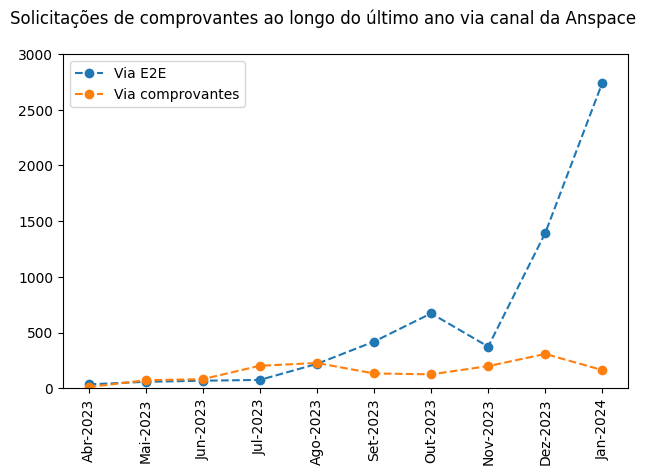

In [16]:
# Gráfico de E2E x Mês

meses = ['Abr-2023', 'Mai-2023', 'Jun-2023', 'Jul-2023', 'Ago-2023', 'Set-2023',
          'Out-2023','Nov-2023', 'Dez-2023', 'Jan-2024']
e2e_por_mes = e2e_df.groupby(['DATA']).count()['E2E']
midia_oculta_por_mes = round(midia_oculta.groupby(['DATA']).count()['EMISSOR']*0.8)

fig, ax1 = plt.subplots()
plt.rcParams['figure.dpi'] = 1500
fig.suptitle('Solicitações de comprovantes ao longo do último ano via canal da Anspace')
ax1.plot(meses, e2e_por_mes, 'o--', label = 'Via E2E')
ax1.plot(meses, midia_oculta_por_mes, 'o--', label = 'Via comprovantes')
ax1.set_xticks(meses)
ax1.set_xticklabels(meses, rotation=90)
ax1.set_ylim((0,3000))
ax1.legend()

fig.tight_layout()

plt.show()


In [17]:
meses = ['Abr-2023', 'Mai-2023', 'Jun-2023', 'Jul-2023', 'Ago-2023', 'Set-2023',
          'Out-2023','Nov-2023', 'Dez-2023', 'Jan-2024']

e2e_por_mes = e2e_df.groupby(['DATA']).count()['E2E']
midia_oculta_por_mes = round(midia_oculta.groupby(['DATA']).count()['EMISSOR'])


x = np.arange(len(meses))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,  e2e_df.groupby(['DATA']).count()['E2E'], width, label='E2E')
rects2 = ax.bar(x + width/2, midia_oculta_por_mes, width, label='Comprovantes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Solicitações')
ax.set_title('Solicitações de comprovantes ao longo do último ano via Anspace')
ax.set_xticks(x)
ax.set_xticklabels(meses, rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 7)


autolabel(rects1)
autolabel(rects2)
ax.set_ylim((0,3000))
fig.tight_layout()

plt.show()

In [392]:
horarios = ['00:00 - 02:59', '03:00 - 05:59', '06:00 - 08:59', '09:00 - 11:59',
            '12:00 - 14:59', '15:00 - 17:59', '18:00 - 20:59', '21:00 - 23:59']
e2e_nov = e2e_df.loc[e2e_df['DATA'] == '2023-11'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
e2e_dez = e2e_df.loc[e2e_df['DATA'] == '2023-12'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
e2e_jan = e2e_df.loc[e2e_df['DATA'] == '2024-01'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']

                     
x = np.arange(len(horarios))  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,  e2e_nov, width, label='Novembro')
rects2 = ax.bar(x + width/2,  e2e_dez, width, label='Dezembro')
rects3 = ax.bar(x + 3*width/2,  e2e_jan, width, label='Janeiro')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Solicitações')
ax.set_title('Solicitações de comprovantes dos últimos três meses via canal da Anspace')
ax.set_xticks(x)
ax.set_xticklabels(horarios, rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 7)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
ax.set_ylim((0,1000))
fig.tight_layout()


C:\Users\caiqu\AppData\Local\Temp\ipykernel_32092\3339144796.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  e2e_nov = e2e_df.loc[e2e_df['DATA'] == '2023-11'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
C:\Users\caiqu\AppData\Local\Temp\ipykernel_32092\3339144796.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  e2e_dez = e2e_df.loc[e2e_df['DATA'] == '2023-12'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
C:\Users\caiqu\AppData\Local\Temp\ipykernel_32092\3339144796.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in

In [393]:
# Gráfico de E2E x Mês

horarios = ['00:00 - 02:59', '03:00 - 05:59', '06:00 - 08:59', '09:00 - 11:59',
            '12:00 - 14:59', '15:00 - 17:59', '18:00 - 20:59', '21:00 - 23:59']
e2e_nov = e2e_df.loc[e2e_df['DATA'] == '2023-11'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
e2e_dez = e2e_df.loc[e2e_df['DATA'] == '2023-12'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
e2e_jan = e2e_df.loc[e2e_df['DATA'] == '2024-01'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']

fig, ax1 = plt.subplots()
plt.rcParams['figure.dpi'] = 1500
fig.suptitle('Solicitações de comprovantes dos últimos três meses no canal Anspace')
ax1.plot(horarios, e2e_nov, 'o--', label = 'Novembro')
ax1.plot(horarios, e2e_dez, 'o--', label = 'Dezembro')
ax1.plot(horarios, e2e_jan, 'o--', label = 'Janeiro')
ax1.set_xticks(horarios)
ax1.set_xticklabels(horarios, rotation=90)
ax1.set_ylim((0,1000))
ax1.legend()

fig.tight_layout()

plt.show()

C:\Users\caiqu\AppData\Local\Temp\ipykernel_32092\1045320759.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  e2e_nov = e2e_df.loc[e2e_df['DATA'] == '2023-11'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
C:\Users\caiqu\AppData\Local\Temp\ipykernel_32092\1045320759.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  e2e_dez = e2e_df.loc[e2e_df['DATA'] == '2023-12'].groupby(pd.cut(e2e_df['HORA'], np.arange(0,25, 3))).count()['E2E']
C:\Users\caiqu\AppData\Local\Temp\ipykernel_32092\1045320759.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in

In [5]:
with open('Conversa do WhatsApp com Genial & Anspace - TI.txt', encoding = "utf8") as f:
    chat_do_wpp = f.read()


# Nossa conversa sempre vai seguir o padrão "dd/mm/aaaa hh:mm - 'Mensagem em texto aqui'"
# Padrão regex garante que cada 
patron = re.compile(r'(?P<data>\d{2}/\d{2}/\d{4} \d{2}:\d{2})\s+-\s+(?P<nome>[^:]+):\s+(?P<mensagem>[\s\S]+?)(?=\n\d{2}/\d{2}/\d{4}|\Z)')
coincidencias = patron.findall(chat_do_wpp)

# Montando o banco de dados com as mensagens
anspace = pd.DataFrame(coincidencias, columns = ['DATA', 'EMISSOR', 'MENSAGEM'])
anspace['HORA'] = pd.to_datetime(anspace['DATA'], dayfirst=True).dt.hour
anspace['MINUTO'] = pd.to_datetime(anspace['DATA'], dayfirst=True).dt.minute
anspace['DATA'] = pd.to_datetime(anspace['DATA'], dayfirst=True).dt.to_period('M')

# adicionar uma coluna com listas referentes aos valores de E2E encontrados na mensagem
patron2 = re.compile(r'[deDE][\w]{31}')
lista = []
for i in range (len(anspace)):
    lista.append(patron2.findall(anspace['MENSAGEM'].loc[i]))
anspace['E2E'] = lista
#display(anspace)

midia_oculta_anspace = anspace.loc[(anspace['MENSAGEM'] == '<Mídia oculta>') & (anspace['EMISSOR'] != 'Biriri Genial') & (anspace['EMISSOR'] != 'Plantao GENIAL Winco')]

# Construindo o banco de dados dos E2E

e2e_anspace = pd.DataFrame(columns = ['DATA', 'HORA', 'MINUTO', 'EMISSOR','E2E'])

for i in range(len(anspace)):
    for value in anspace['E2E'].loc[i]:
        row = {'DATA': anspace['DATA'].loc[i], 'HORA': anspace['HORA'].loc[i], 'MINUTO': anspace['MINUTO'].loc[i], 'EMISSOR': anspace['EMISSOR'].loc[i],'E2E': value}
        e2e_anspace.loc[len(e2e_anspace)] = row

display(e2e_anspace)


DATA  HORA  MINUTO            EMISSOR  \
0     2023-04     7      58  +55 21 97921-1667   
1     2023-04     8      51  +55 21 97059-5493   
2     2023-04    10      10  +55 21 97059-5493   
3     2023-04    10      21  +55 21 97059-5493   
4     2023-04    12      18  +55 21 97059-5493   
...       ...   ...     ...                ...   
7799  2024-03    10      29  +55 21 99911-6875   
7800  2024-03    13      23  +55 21 99911-6875   
7801  2024-03    14      23  +55 21 96546-1129   
7802  2024-03    16      47  +55 21 96546-1129   
7803  2024-03    18      12  +55 21 99911-6875   

                                   E2E  
0     E45246410202304280907Tczvou74Kuy  
1     E45246410202304280021YsKFMInsswf  
2     E45246410202304281230DBJLbVksUct  
3     E45246410202304281249Ik8xZugRTu6  
4     E45246410202304281458PD1JkAm8jjk  
...                                ...  
7799  D004169682024030310116leUtUv9384  
7800  E04120633202403050522rivAFfTl5EW  
7801  E3822485720240304232448557979609  
7802  E45246410202402271541QnhMuVv0ytn  
7803  E0412063320240305052752o9kSuQ2zq  

[7804 rows x 5 columns]

In [20]:
with open('Conversa do WhatsApp com Genial & Payretailers.txt', encoding = "utf8") as f:
    chat_do_wpp = f.read()

patron = re.compile(r'(?P<data>\d{2}/\d{2}/\d{4} \d{2}:\d{2})\s+-\s+(?P<nome>[^:]+):\s+(?P<mensagem>[\s\S]+?)(?=\n\d{2}/\d{2}/\d{4}|\Z)')
coincidencias = patron.findall(chat_do_wpp)

# Montando o banco de dados com as mensagens
payretailers = pd.DataFrame(coincidencias, columns = ['DATA', 'EMISSOR', 'MENSAGEM'])
payretailers['HORA'] = pd.to_datetime(payretailers['DATA'], dayfirst=True).dt.hour
payretailers['MINUTO'] = pd.to_datetime(payretailers['DATA'], dayfirst=True).dt.minute
payretailers['DATA'] = pd.to_datetime(payretailers['DATA'], dayfirst=True).dt.to_period('M')

# adicionar uma coluna com listas referentes aos valores de E2E encontrados na mensagem
patron2 = re.compile(r'[deDE][\w]{31}')
lista = []
for i in range (len(payretailers)):
    lista.append(patron2.findall(payretailers['MENSAGEM'].loc[i]))
payretailers['E2E'] = lista
display(payretailers)

midia_oculta_payretailers = payretailers.loc[(payretailers['MENSAGEM'] == '<Mídia oculta>') & (payretailers['EMISSOR'] != 'Biriri Genial') & (payretailers['EMISSOR'] != 'Plantao GENIAL Winco')]

# Construindo o banco de dados dos E2E

e2e_payretailers = pd.DataFrame(columns = ['DATA', 'HORA', 'MINUTO', 'EMISSOR','E2E'])

for i in range(len(payretailers)):
    for value in payretailers['E2E'].loc[i]:
        row = {'DATA': payretailers['DATA'].loc[i], 'HORA': payretailers['HORA'].loc[i], 'MINUTO': payretailers['MINUTO'].loc[i], 'EMISSOR': payretailers['EMISSOR'].loc[i],'E2E': value}
        e2e_payretailers.loc[len(e2e_payretailers)] = row

display(e2e_payretailers)


DATA            EMISSOR  \
0     2023-04  +55 11 99216-5697   
1     2023-04  +55 11 99216-5697   
2     2023-04  +55 21 99945-9191   
3     2023-04  +55 21 99945-9191   
4     2023-04  +55 21 99945-9191   
...       ...                ...   
2118  2024-03  +55 11 98212-0436   
2119  2024-03  +55 21 99945-9191   
2120  2024-03  +55 21 99945-9191   
2121  2024-03  +55 21 99945-9191   
2122  2024-03  +55 11 98212-0436   

                                               MENSAGEM  HORA  MINUTO E2E  
0     Delano, nós passamos 143k de transações em 24h...    15      47  []  
1     Isso não deve ser linear, esses erros normalme...    15      48  []  
2                                                Beleza    15      56  []  
3                                    Vamos avaliar aqui    15      56  []  
4     segunda já está marcado para alterarmos as con...    17      16  []  
...                                                 ...   ...     ...  ..  
2118  Bom dia pessoal, vocês já tem a solução de ITP...    10       2  []  
2119                                            Bom dia    10      16  []  
2120                                        100% pronta    10      16  []  
2121      Se quiser marcamos uma reunião e te apresento    10      17  []  
2122  Vou confirmar com nosso time comercial e te av...    10      17  []  

[2123 rows x 6 columns]

DATA  HORA  MINUTO               EMISSOR  \
0  2023-04    16      52  Plantao GENIAL Winco   
1  2023-04    10      32     +55 11 99216-5697   
2  2023-05     6      56      +34 648 05 02 27   
3  2023-05    19      58     +55 11 99216-5697   
4  2023-05    19      58     +55 11 99216-5697   
5  2023-05    19      58     +55 11 99216-5697   
6  2023-10    10      38  Plantao GENIAL Winco   
7  2023-12    16      14      +34 617 12 18 01   
8  2023-12    16      14      +34 617 12 18 01   
9  2024-01    18      48       +57 300 2824021   

                                E2E  
0  eeting_ZGI0OWZlZGYtNDg3OS00ODRlL  
1  eeting_MGJiZDNiYzktZTE0Zi00ZDJkL  
2  E18189547202304151853gpeVPmNhGp2  
3  E18236120202304292254s13327ac16a  
4  E18236120202304292254s13327ac16a  
5  E18236120202304292254s13327ac16a  
6  eeting_MDNjOTNhODEtODZkMS00ZjBiL  
7  E45246410202312221650DgR7xvzAKRI  
8  E45246410202312221750VzwLQZFG8Co  
9  E45246410202401171423m0yctBWu7au

In [23]:
with open('Conversa do WhatsApp com PAGSMILE inte. Genial .txt', encoding = "utf8") as f:
    chat_do_wpp = f.read()

patron = re.compile(r'(?P<data>\d{2}/\d{2}/\d{4} \d{2}:\d{2})\s+-\s+(?P<nome>[^:]+):\s+(?P<mensagem>[\s\S]+?)(?=\n\d{2}/\d{2}/\d{4}|\Z)')
coincidencias = patron.findall(chat_do_wpp)

# Montando o banco de dados com as mensagens
pagsmile = pd.DataFrame(coincidencias, columns = ['DATA', 'EMISSOR', 'MENSAGEM'])
pagsmile['HORA'] = pd.to_datetime(pagsmile['DATA'], dayfirst=True).dt.hour
pagsmile['MINUTO'] = pd.to_datetime(pagsmile['DATA'], dayfirst=True).dt.minute
pagsmile['DATA'] = pd.to_datetime(pagsmile['DATA'], dayfirst=True).dt.to_period('M')

# adicionar uma coluna com listas referentes aos valores de E2E encontrados na mensagem
patron2 = re.compile(r'[deDE][\w]{31}')
lista = []
for i in range (len(pagsmile)):
    lista.append(patron2.findall(pagsmile['MENSAGEM'].loc[i]))
pagsmile['E2E'] = lista
display(pagsmile)

midia_oculta_pagsmile = pagsmile.loc[(pagsmile['MENSAGEM'] == '<Mídia oculta>') & (pagsmile['EMISSOR'] != 'Biriri Genial') & (pagsmile['EMISSOR'] != 'Plantao GENIAL Winco')]

# Construindo o banco de dados dos E2E

e2e_pagsmile = pd.DataFrame(columns = ['DATA', 'HORA', 'MINUTO', 'EMISSOR','E2E'])

for i in range(len(pagsmile)):
    for value in pagsmile['E2E'].loc[i]:
        row = {'DATA': pagsmile['DATA'].loc[i], 'HORA': pagsmile['HORA'].loc[i], 'MINUTO': pagsmile['MINUTO'].loc[i], 'EMISSOR': pagsmile['EMISSOR'].loc[i],'E2E': value}
        e2e_pagsmile.loc[len(pagsmile)] = row

display(e2e_pagsmile)

DATA                     EMISSOR  \
0     2022-11  Wellington Castro - Genial   
1     2022-11           +86 132 4141 6773   
2     2022-11          Monitoração GENIAL   
3     2022-11           +55 21 98874-8800   
4     2022-11           +86 132 4141 6773   
...       ...                         ...   
3350  2024-03           +86 132 4141 6773   
3351  2024-03        Plantao GENIAL Winco   
3352  2024-03           +55 11 98486-2776   
3353  2024-03           +55 11 94540-8483   
3354  2024-03           +55 11 94540-8483   

                                               MENSAGEM  HORA  MINUTO E2E  
0                                      Mensagem apagada    10      27  []  
1     Pessoa, vcs chegaram a enviar as informaçoes d...    23      22  []  
2                             Bom dia, vamos verificar.    23      30  []  
3         Opa @8613241416773 o número da conta é 4409-1    23      31  []  
4     Valeu Thiago! pode me enviar tbm a agencia e o...    23      33  []  
...                                                 ...   ...     ...  ..  
3350  Então podemos confirmar que não recebemos o di...     2      46  []  
3351  O status da transação é rejeição do recebiment...     2      48  []  
3352  Pessoal, boa tarde! Tudo bem? Por acaso já pos...    15      27  []  
3353  Luís, além do dashboard temos isso disponível ...    10      57  []  
3354  @8613241416773 Tudo bem? \nComo andam os desen...    10      58  []  

[3355 rows x 6 columns]

DATA  HORA  MINUTO            EMISSOR  \
3355  2024-03    23      49  +86 132 4141 6773   

                                   E2E  
3355  E1300971720240229201312191029688

In [24]:
with open('Conversa do WhatsApp com PaguePay + Genial (Atendimento).txt', encoding = "utf8") as f:
    chat_do_wpp = f.read()

patron = re.compile(r'(?P<data>\d{2}/\d{2}/\d{4} \d{2}:\d{2})\s+-\s+(?P<nome>[^:]+):\s+(?P<mensagem>[\s\S]+?)(?=\n\d{2}/\d{2}/\d{4}|\Z)')
coincidencias = patron.findall(chat_do_wpp)

# Montando o banco de dados com as mensagens
paguepay = pd.DataFrame(coincidencias, columns = ['DATA', 'EMISSOR', 'MENSAGEM'])
paguepay['HORA'] = pd.to_datetime(paguepay['DATA'], dayfirst=True).dt.hour
paguepay['MINUTO'] = pd.to_datetime(paguepay['DATA'], dayfirst=True).dt.minute
paguepay['DATA'] = pd.to_datetime(paguepay['DATA'], dayfirst=True).dt.to_period('M')

# adicionar uma coluna com listas referentes aos valores de E2E encontrados na mensagem
patron2 = re.compile(r'[deDE][\w]{31}')
lista = []
for i in range (len(paguepay)):
    lista.append(patron2.findall(paguepay['MENSAGEM'].loc[i]))
paguepay['E2E'] = lista
display(paguepay)

midia_oculta_paguepay = paguepay.loc[(pagsmile['MENSAGEM'] == '<Mídia oculta>') & (paguepay['EMISSOR'] != 'Biriri Genial') & (paguepay['EMISSOR'] != 'Plantao GENIAL Winco')]

# Construindo o banco de dados dos E2E

e2e_paguepay = pd.DataFrame(columns = ['DATA', 'HORA', 'MINUTO', 'EMISSOR','E2E'])

for i in range(len(paguepay)):
    for value in paguepay['E2E'].loc[i]:
        row = {'DATA': paguepay['DATA'].loc[i], 'HORA': paguepay['HORA'].loc[i], 'MINUTO': paguepay['MINUTO'].loc[i], 'EMISSOR': paguepay['EMISSOR'].loc[i],'E2E': value}
        e2e_paguepay.loc[len(pagsmile)] = row

display(e2e_paguepay)

DATA               EMISSOR  \
0    2023-12     +55 21 99351-2992   
1    2023-12     +55 21 99351-2992   
2    2023-12          Thiago Frias   
3    2023-12     +55 21 99351-2992   
4    2023-12         Biriri Genial   
..       ...                   ...   
589  2024-03      +55 51 9005-2219   
590  2024-03      +55 51 9005-2219   
591  2024-03  Plantao GENIAL Winco   
592  2024-03     +55 19 99303-4265   
593  2024-03  Plantao GENIAL Winco   

                                              MENSAGEM  HORA  MINUTO  \
0                                            Previsão?    23      27   
1                                                    ?    23      47   
2    Pessoal, seguimos em atuação com os times. Atu...    23      48   
3                                                   Ok    23      48   
4    Prezados, \nAmbiente normalizado. Podem valida...     0       2   
..                                                 ...   ...     ...   
589  boa tarde @551149357908 \npode consular se ess...    16      10   
590                                     <Mídia oculta>    16      12   
591                                     <Mídia oculta>    16      20   
592  @551149357908 poderiam consulta um cashout par...    18      40   
593                         Transação não localizada\n    18      42   

                                    E2E  
0                                    []  
1                                    []  
2                                    []  
3                                    []  
4                                    []  
..                                  ...  
589                                  []  
590                                  []  
591                                  []  
592  [E45246410202401031536CEpA7TL7eHj]  
593                                  []  

[594 rows x 6 columns]

DATA  HORA  MINUTO            EMISSOR  \
3355  2024-03    18      40  +55 19 99303-4265   

                                   E2E  
3355  E45246410202401031536CEpA7TL7eHj

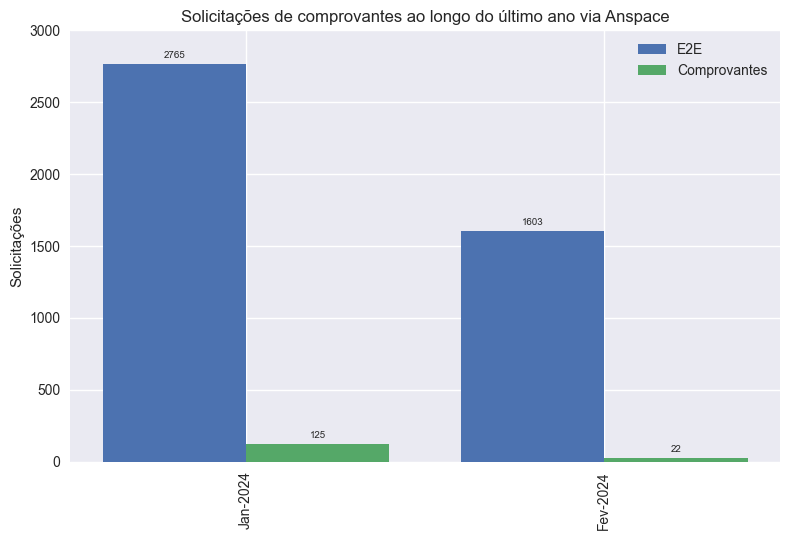

In [40]:

meses = ['Jan-2024', 'Fev-2024']

e2e_por_mes_anspace = e2e_anspace.groupby(['DATA']).count()['E2E']
midia_oculta_por_mes_anspace = round(midia_oculta_anspace.groupby(['DATA']).count()['EMISSOR'])


x = np.arange(len(meses))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
plt.style.use('seaborn-v0_8')
rects1 = ax.bar(x - width/2,  e2e_por_mes_anspace[9:11], width, label='E2E')

rects2 = ax.bar(x + width/2, midia_oculta_por_mes_anspace[10:], width, label='Comprovantes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Solicitações')
ax.set_title('Solicitações de comprovantes ao longo do último ano via Anspace')
ax.set_xticks(x)
ax.set_xticklabels(meses, rotation=90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', size = 7)


autolabel(rects1)
autolabel(rects2)
ax.set_ylim((0,3000))
fig.tight_layout()

plt.show()


In [ ]:
\